In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Prepare the dataset for the algorithm

In [17]:
df.head()

,INBRED,TESTER,avg,med,sd,cv,qt
0,Inbred_1071,Tester_1345,0.986544,1.012475,0.128227,0.129976,3
1,Inbred_1071,Tester_4373,1.057704,1.059865,0.092430,0.087388,6
2,Inbred_1071,Tester_4473,1.023704,1.044409,0.103460,0.101064,5
3,Inbred_1071,Tester_4541,1.014735,1.025219,0.046778,0.046099,4
4,Inbred_1071,Tester_5305,1.062727,1.036744,0.088751,0.083513,6


In [22]:
df = pd.read_csv("train_data.csv")
df.drop(labels=df.columns[0], axis=1, inplace=True)
df_rotated = df.pivot(index='INBRED', columns='TESTER', values='avg')
df_rotated.fillna(0.0, inplace=True)

In [24]:
R = df_rotated.values

In [91]:
class MF():
    
    def __init__(self, R, K, alpha, beta, iterations):
        """
        Perform matrix factorization to predict empty
        entries in a matrix.
        
        Arguments
        - R (ndarray)   : user-item rating matrix
        - K (int)       : number of latent dimensions
        - alpha (float) : learning rate
        - beta (float)  : regularization parameter
        """
        
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    def train(self):
        # Initialize user and item latent feature matrice
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))
        
        # Initialize the biases
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])
        
        # Create a list of training samples
        self.samples = [
            (i, j, self.R[i, j])
            for i in range(self.num_users)
            for j in range(self.num_items)
            if self.R[i, j] > 0
        ]
        
        # Perform stochastic gradient descent for number of iterations
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            training_process.append((i, mse))
            if (i+1) % 10 == 0:
                print("Iteration: %d ; error = %.4f" % (i+1, mse))
        
        return training_process

    def mse(self):
        """
        A function to compute the total mean square error
        """
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    def sgd(self):
        """
        Perform stochastic graident descent
        """
        for i, j, r in self.samples:
            # Computer prediction and error
            prediction = self.get_rating(i, j)
            e = (r - prediction)
            
            # Update biases
            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])
            
            # Create copy of row of P since we need to update it but use older values for update on Q
            P_i = self.P[i, :][:]
            
            # Update user and item latent feature matrices
            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * P_i - self.beta * self.Q[j,:])

    def get_rating(self, i, j):
        """
        Get the predicted rating of user i and item j
        """
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction
    
    def full_matrix(self):
        """
        Computer the full matrix using the resultant biases, P and Q
        """
        return mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T)  + mf.b

# R = np.array([
#     [5, 3, 0, 1],
#     [4, 0, 0, 1],
#     [1, 1, 0, 5],
#     [1, 0, 0, 4],
#     [0, 1, 5, 4],
# ])






In [109]:
mf = MF(R, K=5, alpha=0.1, beta=0.00001, iterations=1000)
training_process = mf.train()
print()
# print("P x Q:")
# print(mf.full_matrix())
# print()
print("Global bias:")
print(mf.b)
# print()
# print("User bias:")
# print(mf.b_u)
# print()
# print("Item bias:")
# print(mf.b_i)


Iteration: 10 ; error = 4.7924
Iteration: 20 ; error = 4.2890
Iteration: 30 ; error = 4.0409
Iteration: 40 ; error = 3.9029
Iteration: 50 ; error = 3.7843
Iteration: 60 ; error = 3.6669
Iteration: 70 ; error = 3.5736
Iteration: 80 ; error = 3.4996
Iteration: 90 ; error = 3.4294
Iteration: 100 ; error = 3.3801
Iteration: 110 ; error = 3.3276
Iteration: 120 ; error = 3.2679
Iteration: 130 ; error = 3.2206
Iteration: 140 ; error = 3.1764
Iteration: 150 ; error = 3.1386
Iteration: 160 ; error = 3.1458
Iteration: 170 ; error = 3.0967
Iteration: 180 ; error = 3.0654
Iteration: 190 ; error = 3.0352
Iteration: 200 ; error = 3.0035
Iteration: 210 ; error = 2.9897
Iteration: 220 ; error = 2.9567
Iteration: 230 ; error = 2.9395
Iteration: 240 ; error = 2.9012
Iteration: 250 ; error = 2.8812
Iteration: 260 ; error = 2.8711
Iteration: 270 ; error = 2.8495
Iteration: 280 ; error = 2.8342
Iteration: 290 ; error = 2.8142
Iteration: 300 ; error = 2.8027
Iteration: 310 ; error = 2.7768
Iteration: 320 ; 

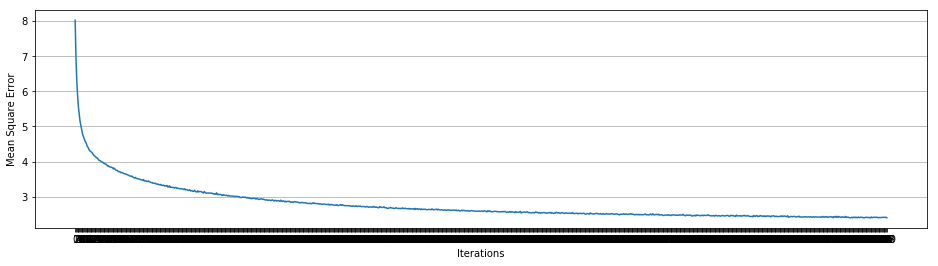

In [110]:
x = [x for x, y in training_process]
y = [y for x, y in training_process]
plt.figure(figsize=((16,4)))
plt.plot(x, y)
plt.xticks(x, x)
plt.xlabel("Iterations")
plt.ylabel("Mean Square Error")
plt.grid(axis="y")



(array([2.00000e+00, 1.10000e+01, 2.48000e+02, 4.50200e+03, 1.19315e+05,
        1.63454e+05, 4.25900e+03, 1.54000e+02, 7.00000e+00, 2.00000e+00]),
 array([-0.36427904, -0.09660504,  0.17106897,  0.43874297,  0.70641698,
         0.97409098,  1.24176498,  1.50943899,  1.77711299,  2.044787  ,
         2.312461  ]),
 <a list of 10 Patch objects>)

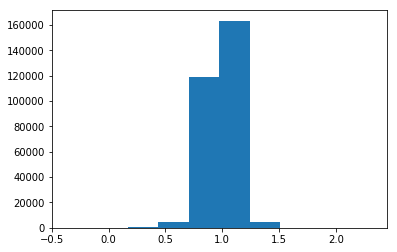

In [111]:
x = mf.full_matrix()
plt.hist(np.reshape(x, R.shape[0]*R.shape[1], 1))

In [112]:
pred = mf.full_matrix()

First let put the data back in a data fram

In [113]:
pref_df = pd.DataFrame(pred, columns=df_rotated.columns, index=df_rotated.index)

In [125]:
df_test = pd.read_csv("test_data.csv")
df_test.drop(labels=df_test.columns[0], axis=1, inplace=True)
df_test_rotated = df_test.pivot(index='INBRED', columns='TESTER', values='avg')
# df_test_rotated.fillna(-999.0, inplace=True)

Compute the testing MSE

In [155]:
rmse = 0
arr = []
for idx, row in df_test_rotated.iterrows():
    if idx in pref_df.index:
        arr.append([pow((df_test_rotated.loc[idx, col] - pref_df.loc[idx, col]), 2) for col, val in row.iteritems() if ~np.isnan(val) and col in df_rotated.columns ])
count = len(arr)
rmse = np.sqrt(sum(np.sum(arr))/count)

In [156]:
rmse

0.13297615364881699

(array([985.,  61.,  23.,   9.,   6.,   2.,   1.,   0.,   0.,   1.]),
 array([6.44678660e-09, 1.91994586e-02, 3.83989107e-02, 5.75983628e-02,
        7.67978149e-02, 9.59972670e-02, 1.15196719e-01, 1.34396171e-01,
        1.53595623e-01, 1.72795075e-01, 1.91994528e-01]),
 <a list of 10 Patch objects>)

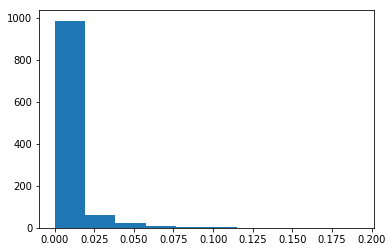

In [159]:
plt.hist(np.sum(arr))

In [161]:
import seaborn as sns

C:\Users\Martins\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


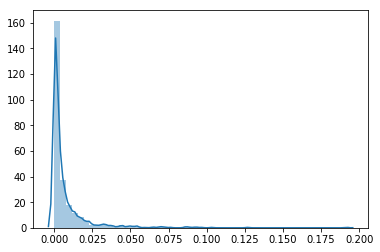

In [162]:
sns.distplot(np.sum(arr))

In [2]:
kmax = 30
ks  = range(2, kmax+1, 2)
alphas = [10**i for i in range(-5,0)]
betas = [10**i for i in range(-5,0)]
lambdas = [10**i for i in range(-5,0)]
best_test_error = {}
for k in ks:
    print(f'running k = {k}')
    if k > 5:
        for a in alphas:
            for beta in betas:
                for lambda_bias in lambdas:
                    mf = MF(train, K=k, alpha=a, beta=beta, iterations=300, lambda_bias=lambda_bias)
                    training_process, test_process = mf.train()
                    best_test_error[(k, a, beta, lambda_bias)] = min(test_process)

                    
                    
                    


SyntaxError: unexpected EOF while parsing (<ipython-input-2-b6b840d7d7b3>, line 20)

In [1]:
class Write():
    def __init__(self):
        self.i = 0
    
    def __call__(self, nums):
        output = [nums]
        print(nums)
        return output

In [2]:
from multiprocessing import Pool

In [ ]:
class Write():
    def __init__(self):
        self.i = 0
    
    def __call__(self, nums):
        output = [nums]
        print(nums)
        return output
try:
    pool = Pool(2) # on 8 processors
    engine = Write()
    data_outputs = pool.map(engine, [1,2,3])
finally: # To make sure processes are closed in the end, even if errors happen
    pool.join()
    pool.close()
    

In [ ]:
from multiprocessing import Pool

def f(x):
    return x*x

if __name__ == '__main__':
    p = Pool(5)
    print(p.map(f, [1, 2, 3]))